Dataset shape: (10000, 21)

First 5 rows:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  13.919331   0.791082  -2.578970  -1.629338  -5.271231  -2.486054   
1  10.911144  -0.525945  -3.199819   2.796555  -1.540241   0.806536   
2   4.536548   0.163488  -2.331628   0.058797  -4.288186   0.433961   
3  14.187379  -1.319847  -3.972818  -2.796683  -1.632752  -1.361741   
4   9.222316  -0.555664  -5.384012  -0.883848  -2.226261   1.659144   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0   1.907795   1.902715  -2.363631   3.551098  ...    6.296613   -2.245644   
1   3.720664  -1.356440  -0.838924  -1.041738  ...   -7.959789   -1.549392   
2   2.204198   1.957120   0.624522   2.467952  ...    6.409779    3.180055   
3   3.213520   3.720563  -4.497270   3.191274  ...    9.097593    0.493361   
4   2.734401  -3.359074  -4.205752  -4.542212  ...   -3.007942   -0.201719   

   feature_13  feature_14  feature_15  feature_16  feature_17 

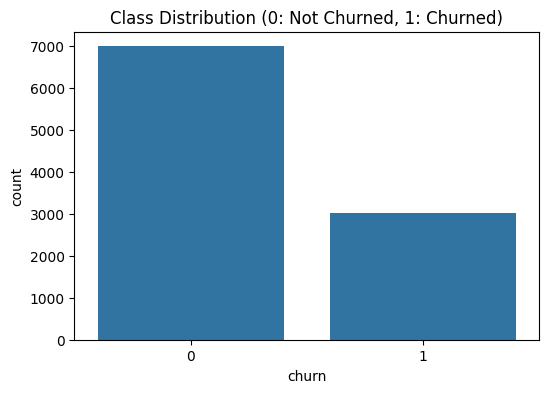


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2095
           1       0.96      0.92      0.94       905

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000


Confusion Matrix:
[[2059   36]
 [  76  829]]

Accuracy: 0.9626666666666667
F1 Score: 0.9367231638418079
ROC AUC Score: 0.9885726341328339


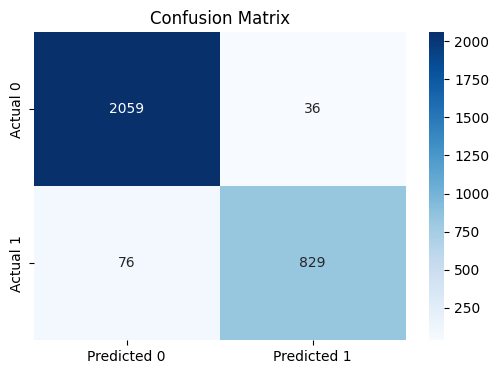

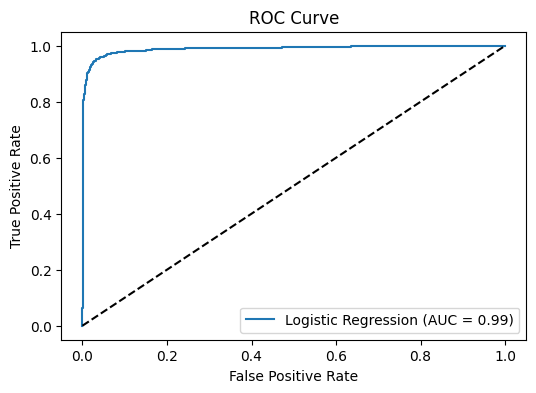

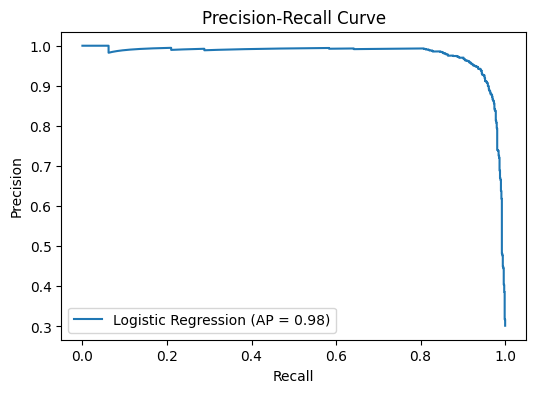

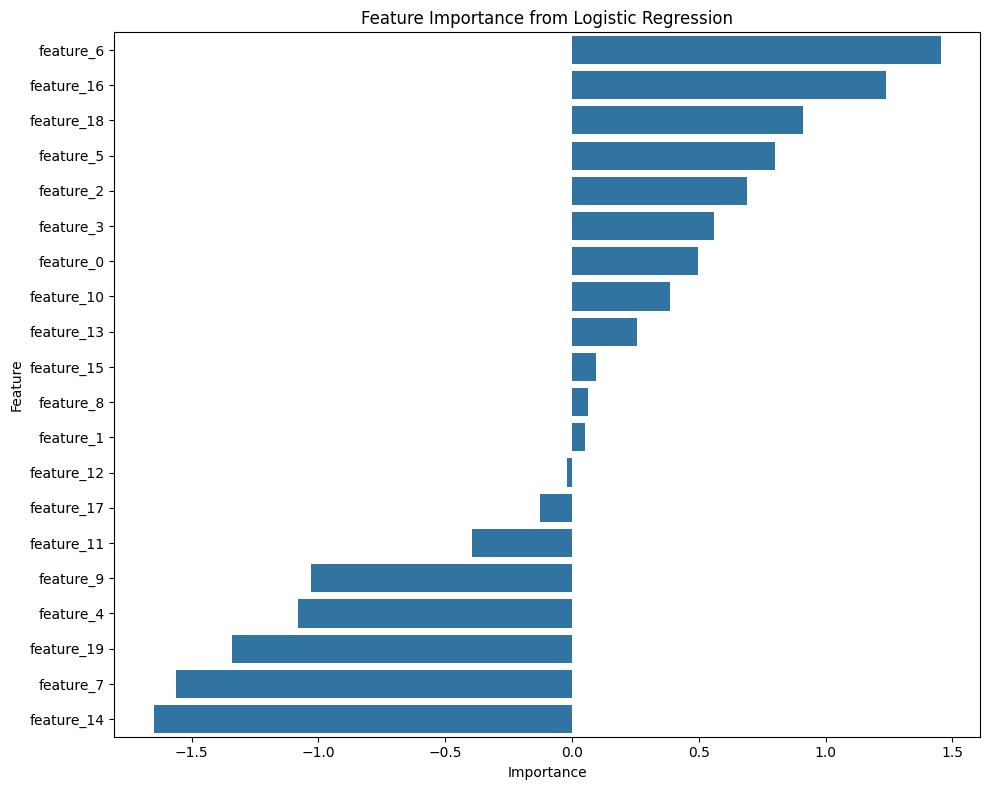

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                            accuracy_score, f1_score, roc_auc_score,
                            roc_curve, precision_recall_curve, average_precision_score)
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('customer_churn_dataset.csv')

# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nClass distribution:")
print(df['churn'].value_counts())
print("\nMissing values:")
print(df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Class Distribution (0: Not Churned, 1: Churned)')
plt.show()

# Prepare data for modeling
X = df.drop('churn', axis=1)
y = df['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}

logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_logreg = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_logreg.predict(X_test_scaled)
y_pred_proba = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Logistic Regression (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_logreg.coef_[0]
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'churn'],
      dtype='object')

In [ ]:
import pandas as pd

# Load your original dataset
df = pd.read_csv("customer_churn_dataset.csv")

# Rename features to realistic names
realistic_feature_names = {
    "feature_0": "MonthlyCharges",
    "feature_1": "Tenure",
    "feature_2": "TotalCharges",
    "feature_3": "NumCustomerServiceCalls",
    "feature_4": "ContractType",
    "feature_5": "PaymentMethod",
    "feature_6": "InternetService",
    "feature_7": "OnlineSecurity",
    "feature_8": "OnlineBackup",
    "feature_9": "DeviceProtection",
    "feature_10": "TechSupport",
    "feature_11": "StreamingTV",
    "feature_12": "StreamingMovies",
    "feature_13": "PaperlessBilling",
    "feature_14": "SeniorCitizen",
    "feature_15": "Partner",
    "feature_16": "Dependents",
    "feature_17": "MultipleLines",
    "feature_18": "PhoneService",
    "feature_19": "Gender"
}

df = df.rename(columns=realistic_feature_names)

# Save the renamed dataset
df.to_csv("customer_churn_realistic.csv", index=False)
print("Renamed dataset saved as 'customer_churn_realistic.csv'")


Renamed dataset saved as 'customer_churn_realistic.csv'


In [ ]:
df1 = pd.read_csv('customer_churn_realistic.csv')

In [ ]:
df1

,MonthlyCharges,Tenure,TotalCharges,NumCustomerServiceCalls,ContractType,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,SeniorCitizen,Partner,Dependents,MultipleLines,PhoneService,Gender,churn
0,13.919331,0.791082,-2.578970,-1.629338,-5.271231,-2.486054,1.907795,1.902715,-2.363631,3.551098,...,6.296613,-2.245644,1.410449,0.082657,1.455528,1.122309,-0.364101,-5.177382,2.451621,0
1,10.911144,-0.525945,-3.199819,2.796555,-1.540241,0.806536,3.720664,-1.356440,-0.838924,-1.041738,...,-7.959789,-1.549392,3.684719,-3.286143,-2.849789,1.080880,-1.794734,-0.036781,4.785092,1
2,4.536548,0.163488,-2.331628,0.058797,-4.288186,0.433961,2.204198,1.957120,0.624522,2.467952,...,6.409779,3.180055,3.326034,4.960384,2.445266,1.029692,0.104027,-1.148485,-0.283163,0
3,14.187379,-1.319847,-3.972818,-2.796683,-1.632752,-1.361741,3.213520,3.720563,-4.497270,3.191274,...,9.097593,0.493361,1.914744,1.776501,5.621038,0.644319,0.126882,-2.482002,1.154268,0
4,9.222316,-0.555664,-5.384012,-0.883848,-2.226261,1.659144,2.734401,-3.359074,-4.205752,-4.542212,...,-3.007942,-0.201719,-1.950215,-4.307695,2.275977,-0.924254,1.789955,-1.438413,0.201869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.962711,2.086577,-5.331971,-4.641340,-3.745762,-4.779065,0.548404,-2.623408,-0.572488,0.986902,...,-2.985114,1.692751,2.682798,5.583651,1.700030,0.951522,0.529864,-2.100070,2.552638,0
9996,10.821702,0.332391,-2.664863,-1.655014,-8.027478,-2.770444,7.585794,4.289388,0.072684,5.051901,...,15.706875,1.416061,-1.615353,4.403166,0.601117,3.645520,-1.693769,-3.284720,3.203225,0
9997,-3.325675,-1.109517,-2.342051,2.110633,0.301046,1.645992,-1.825523,-3.637236,3.735505,-2.011429,...,-9.563888,1.060887,-1.001488,-0.170173,-2.313191,-4.209262,-1.195568,-1.987151,3.405501,0
9998,-12.254637,0.174284,-2.610334,1.890312,2.761129,1.579146,-3.567999,-4.107394,3.231693,-3.744703,...,-12.348189,0.407829,-4.244787,0.548573,-4.689303,-4.101984,-1.194477,0.638794,3.025810,0


In [ ]:
import pandas as pd

# Load your original dataset
df = pd.read_csv("customer_churn_dataset.csv")

# Rename features to SaaS-related names
saas_feature_names = {
    "feature_0": "SubscriptionLength",
    "feature_1": "PaymentMethod",
    "feature_2": "MonthlyBillingAmount",
    "feature_3": "PlanType",
    "feature_4": "NumberOfLogins",
    "feature_5": "NumberOfFeaturesUsed",
    "feature_6": "ActiveUsers",
    "feature_7": "SupportTicketsFiled",
    "feature_8": "CustomerRole",
    "feature_9": "LastLoginDate",
    "feature_10": "Downgrades",
    "feature_11": "Upgrades",
    "feature_12": "NegativeFeedback",
    "feature_13": "AutoRenewalEnabled",
    "feature_14": "DiscountApplied",
    "feature_15": "ContractType",
    "feature_16": "ChurnProbability",
    "feature_17": "Industry",
    "feature_18": "CustomerSegment",
    "feature_19": "CustomerSize"
}

df = df.rename(columns=saas_feature_names)

# Save the renamed dataset for SaaS churn prediction
df.to_csv("customer_churn_saas.csv", index=False)
print("Renamed SaaS dataset saved as 'customer_churn_saas.csv'")


Renamed SaaS dataset saved as 'customer_churn_saas.csv'


In [ ]:
df2 = pd.read_csv('customer_churn_saas.csv')

In [ ]:
df2

,SubscriptionLength,PaymentMethod,MonthlyBillingAmount,PlanType,NumberOfLogins,NumberOfFeaturesUsed,ActiveUsers,SupportTicketsFiled,CustomerRole,LastLoginDate,...,Upgrades,NegativeFeedback,AutoRenewalEnabled,DiscountApplied,ContractType,ChurnProbability,Industry,CustomerSegment,CustomerSize,churn
0,13.919331,0.791082,-2.578970,-1.629338,-5.271231,-2.486054,1.907795,1.902715,-2.363631,3.551098,...,6.296613,-2.245644,1.410449,0.082657,1.455528,1.122309,-0.364101,-5.177382,2.451621,0
1,10.911144,-0.525945,-3.199819,2.796555,-1.540241,0.806536,3.720664,-1.356440,-0.838924,-1.041738,...,-7.959789,-1.549392,3.684719,-3.286143,-2.849789,1.080880,-1.794734,-0.036781,4.785092,1
2,4.536548,0.163488,-2.331628,0.058797,-4.288186,0.433961,2.204198,1.957120,0.624522,2.467952,...,6.409779,3.180055,3.326034,4.960384,2.445266,1.029692,0.104027,-1.148485,-0.283163,0
3,14.187379,-1.319847,-3.972818,-2.796683,-1.632752,-1.361741,3.213520,3.720563,-4.497270,3.191274,...,9.097593,0.493361,1.914744,1.776501,5.621038,0.644319,0.126882,-2.482002,1.154268,0
4,9.222316,-0.555664,-5.384012,-0.883848,-2.226261,1.659144,2.734401,-3.359074,-4.205752,-4.542212,...,-3.007942,-0.201719,-1.950215,-4.307695,2.275977,-0.924254,1.789955,-1.438413,0.201869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.962711,2.086577,-5.331971,-4.641340,-3.745762,-4.779065,0.548404,-2.623408,-0.572488,0.986902,...,-2.985114,1.692751,2.682798,5.583651,1.700030,0.951522,0.529864,-2.100070,2.552638,0
9996,10.821702,0.332391,-2.664863,-1.655014,-8.027478,-2.770444,7.585794,4.289388,0.072684,5.051901,...,15.706875,1.416061,-1.615353,4.403166,0.601117,3.645520,-1.693769,-3.284720,3.203225,0
9997,-3.325675,-1.109517,-2.342051,2.110633,0.301046,1.645992,-1.825523,-3.637236,3.735505,-2.011429,...,-9.563888,1.060887,-1.001488,-0.170173,-2.313191,-4.209262,-1.195568,-1.987151,3.405501,0
9998,-12.254637,0.174284,-2.610334,1.890312,2.761129,1.579146,-3.567999,-4.107394,3.231693,-3.744703,...,-12.348189,0.407829,-4.244787,0.548573,-4.689303,-4.101984,-1.194477,0.638794,3.025810,0


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1381
           1       0.95      0.92      0.93       619

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



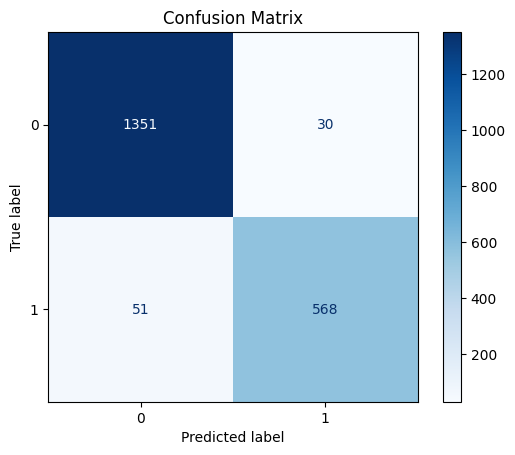

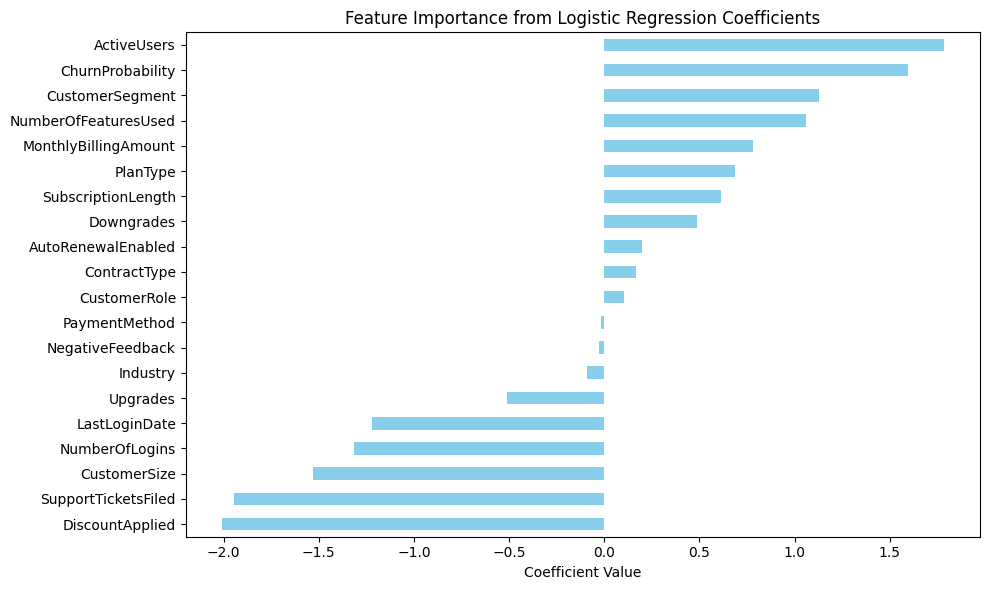

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Load the dataset
df = pd.read_csv("/content/customer_churn_saas.csv")

# 2. Preprocess the dataset
df = df.dropna()  # Drop missing values for simplicity

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 3. Define features and target
X = df.drop('churn', axis=1)  # Assuming 'Churn' is the target
y = df['churn']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7. Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 8. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 9. Feature Importance (Coefficients)
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


Accuracy : 0.9595
Precision: 0.9498
Recall   : 0.9176
F1 Score : 0.9334
RMSE     : 0.1786
R²       : 0.8507

Classification Report:
               precision    recall  f1-score   support

    No churn       0.96      0.98      0.97      1381
       churn       0.95      0.92      0.93       619

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



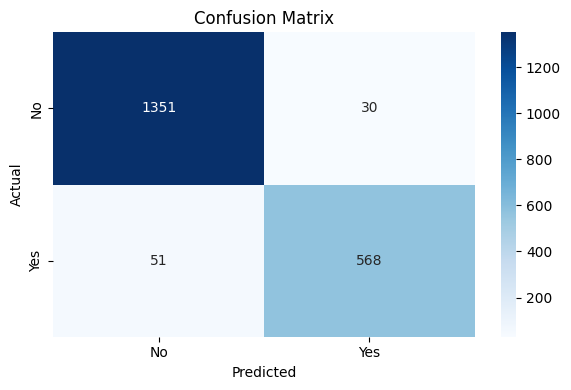

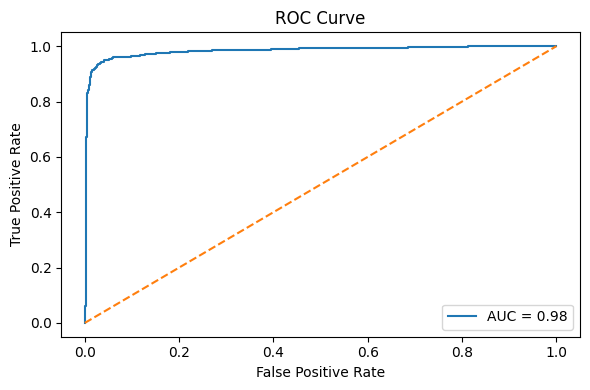

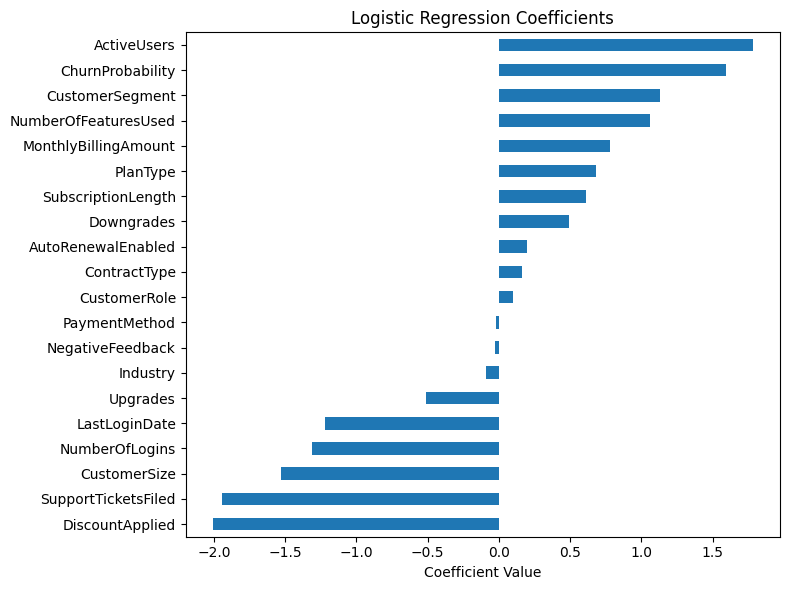

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    mean_squared_error,
    r2_score
)

# 1. Load & preprocess
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
for col in df.select_dtypes(include='object').columns:
    df[col], _ = LabelEncoder().fit_transform(df[col]), None

X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# 2. Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Predict
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 4. Classification metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No churn','churn'])

# 5. Regression‐style metrics on probabilities
rmse = np.sqrt(mean_squared_error(y_test, y_proba))
r2   = r2_score(y_test, y_proba)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f}\n")
print("Classification Report:\n", report)

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 7. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 8. Feature Importance
coeffs = pd.Series(model.coef_[0], index=X.columns).sort_values()
plt.figure(figsize=(8,6))
coeffs.plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


Accuracy : 0.9865
Precision: 0.9884
Recall   : 0.9677
F1 Score : 0.9780
RMSE     : 0.1458
R²       : 0.9006

Classification Report:
               precision    recall  f1-score   support

    No churn       0.99      0.99      0.99      1381
       churn       0.99      0.97      0.98       619

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



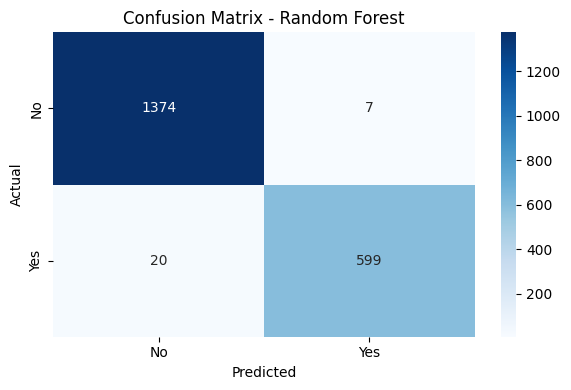

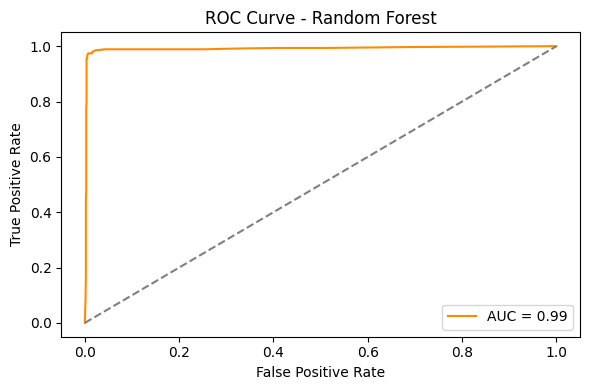

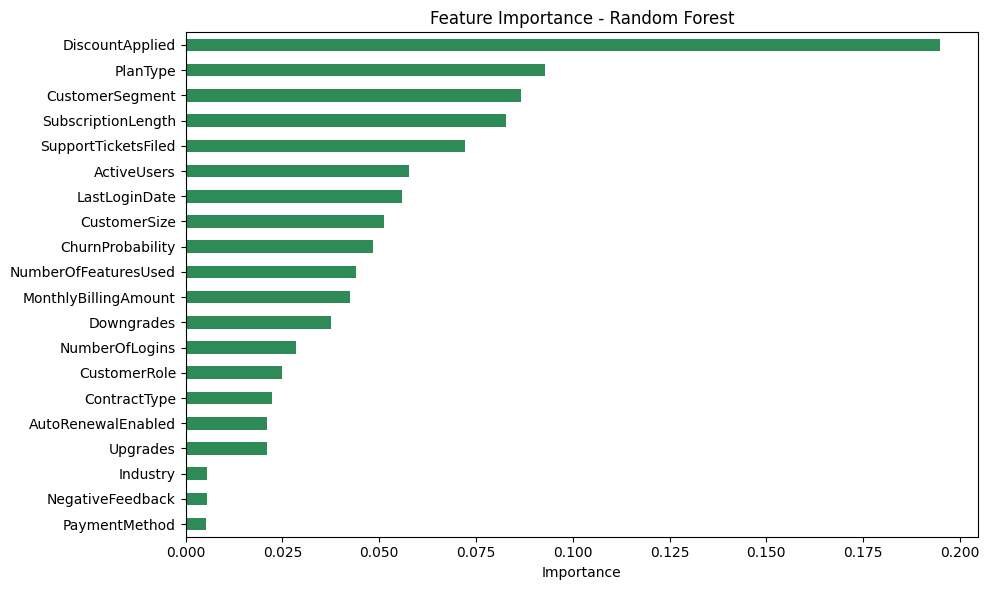

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    mean_squared_error,
    r2_score
)

# 1. Load and preprocess dataset
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('churn', axis=1)
y = df['churn']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 3. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 4. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_proba))
r2 = r2_score(y_test, y_proba)
report = classification_report(y_test, y_pred, target_names=['No churn', 'churn'])

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"R²       : {r2:.4f}\n")
print("Classification Report:\n", report)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 7. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='seagreen')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


Accuracy : 0.8800
Precision: 0.9041
Recall   : 0.6850
F1 Score : 0.7794

Confusion Matrix:
 [[1336   45]
 [ 195  424]]

Classification Report:
               precision    recall  f1-score   support

    No churn       0.87      0.97      0.92      1381
       churn       0.90      0.68      0.78       619

    accuracy                           0.88      2000
   macro avg       0.89      0.83      0.85      2000
weighted avg       0.88      0.88      0.87      2000



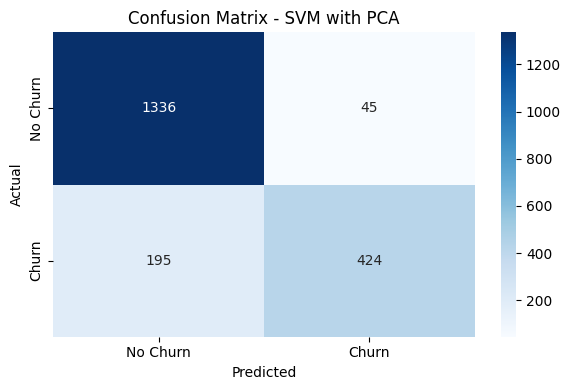

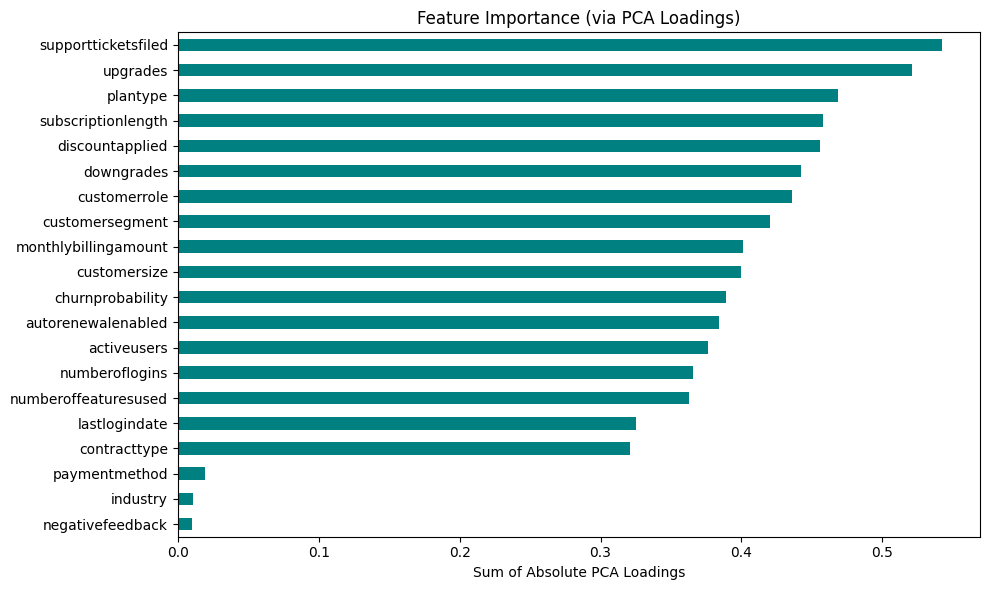

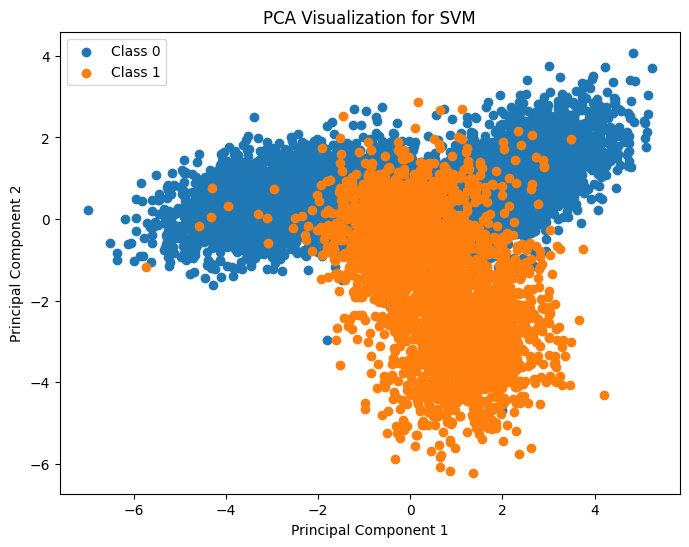

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1381
           1       0.89      0.82      0.85       619

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# 1. Load and preprocess
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
df.columns = df.columns.str.lower()  # convert column names to lowercase
target_column = 'churn'

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)  # for visualization
X_pca = pca.fit_transform(X_scaled)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Train SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 6. Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No churn', 'churn'])

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 7. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - SVM with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 8. Feature Importance (PCA component loadings)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
importance = np.abs(loadings).sum(axis=1)

plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (via PCA Loadings)")
plt.xlabel("Sum of Absolute PCA Loadings")
plt.tight_layout()
plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42) # Example parameters. Adjust as needed.
svm_model.fit(X_train_pca, y_train)

# Predict
y_pred = svm_model.predict(X_test_pca)


# Visualization
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization for SVM")
plt.legend()
plt.show()

# Evaluate the model (optional but recommended)
print(classification_report(y_test, y_pred))


Accuracy : 0.9905
Precision: 0.9902
Recall   : 0.9790
F1 Score : 0.9846

Confusion Matrix:
 [[1375    6]
 [  13  606]]

Classification Report:
               precision    recall  f1-score   support

    No churn       0.99      1.00      0.99      1381
       churn       0.99      0.98      0.98       619

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



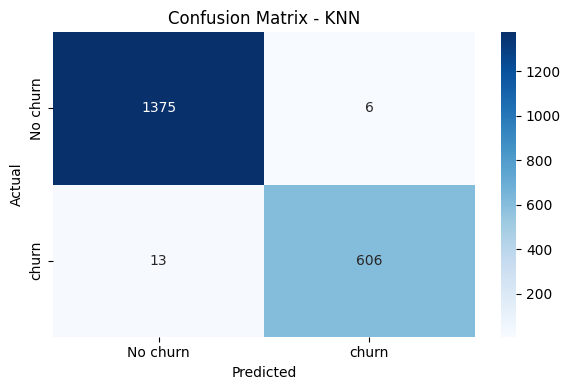

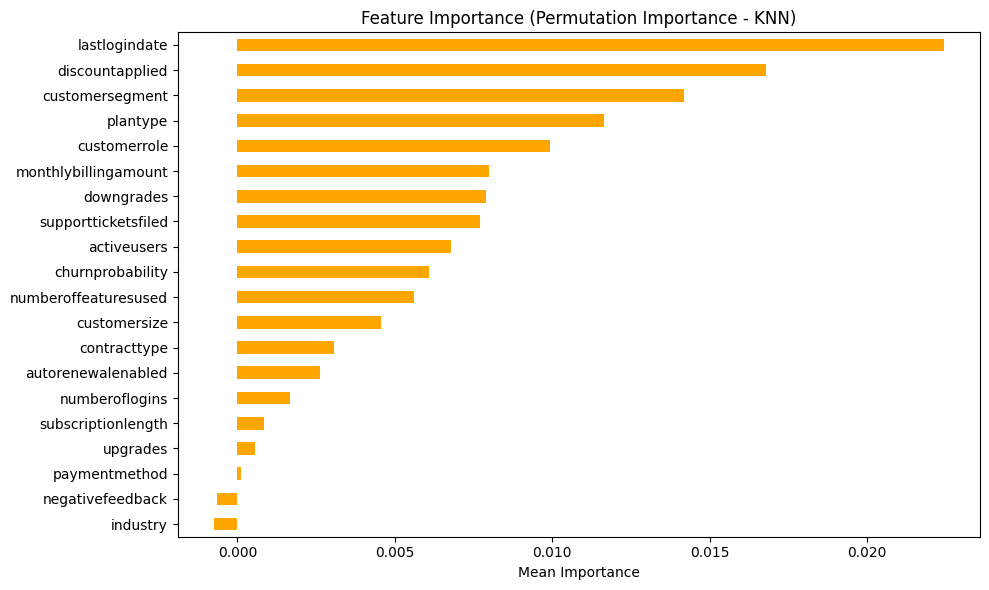

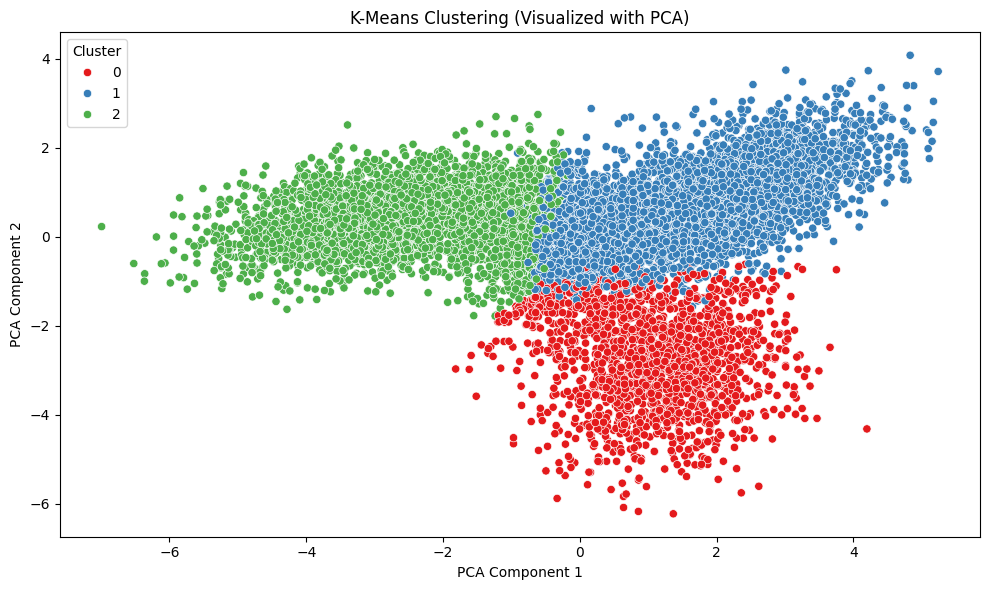

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.inspection import permutation_importance

# 1. Load and preprocess
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
df.columns = df.columns.str.lower()
target_column = 'churn'

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 4. Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# 5. Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No churn', 'churn'])

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 6. Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 7. Feature Importance via Permutation
perm = permutation_importance(knn_model, X_test, y_test, n_repeats=30, random_state=42)
importance_df = pd.Series(perm.importances_mean, index=X.columns).sort_values()

plt.figure(figsize=(10,6))
importance_df.plot(kind='barh', color='orange')
plt.title("Feature Importance (Permutation Importance - KNN)")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(target_column, axis=1)

# 2. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4. Add clusters to original dataframe
df['Cluster'] = clusters

# 5. Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 6. Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("K-Means Clustering (Visualized with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy : 0.9850
Precision: 0.9820
Recall   : 0.9693
F1 Score : 0.9756

Confusion Matrix:
 [[1370   11]
 [  19  600]]

Classification Report:
               precision    recall  f1-score   support

    No churn       0.99      0.99      0.99      1381
       churn       0.98      0.97      0.98       619

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



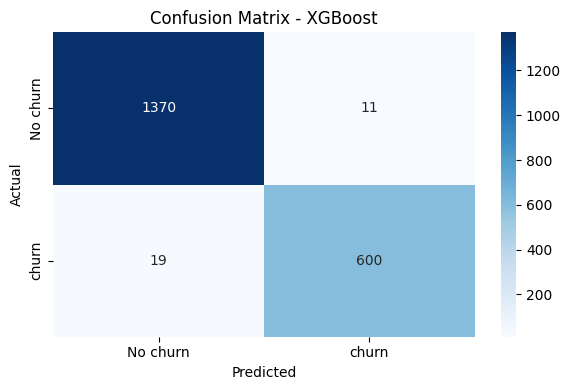

<Figure size 1000x600 with 0 Axes>

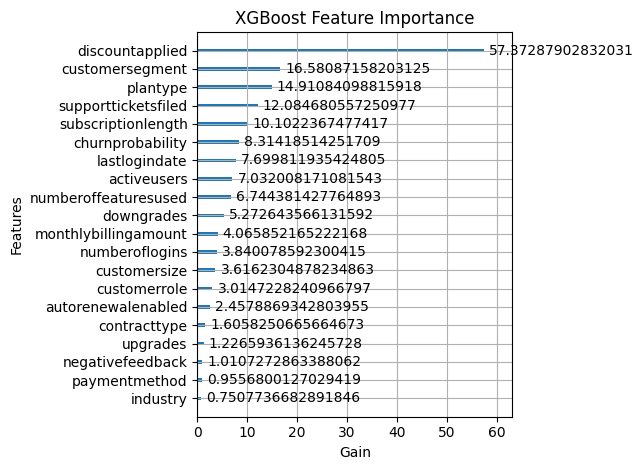

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from xgboost import XGBClassifier, plot_importance

# 1. Load and preprocess data
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
df.columns = df.columns.str.lower()
target_column = 'churn'

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 3. Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# 4. Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No churn', 'churn'])

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 5. Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 6. Feature Importance Plot
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', title="XGBoost Feature Importance", xlabel="Gain")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.9600,0.9499,0.9192,0.9343
Random Forest,0.9865,0.9884,0.9677,0.9780
XGBoost,0.9850,0.9820,0.9693,0.9756
SVM,0.9595,0.9559,0.9111,0.9330
KNN,0.9905,0.9902,0.9790,0.9846


<Figure size 1200x800 with 0 Axes>

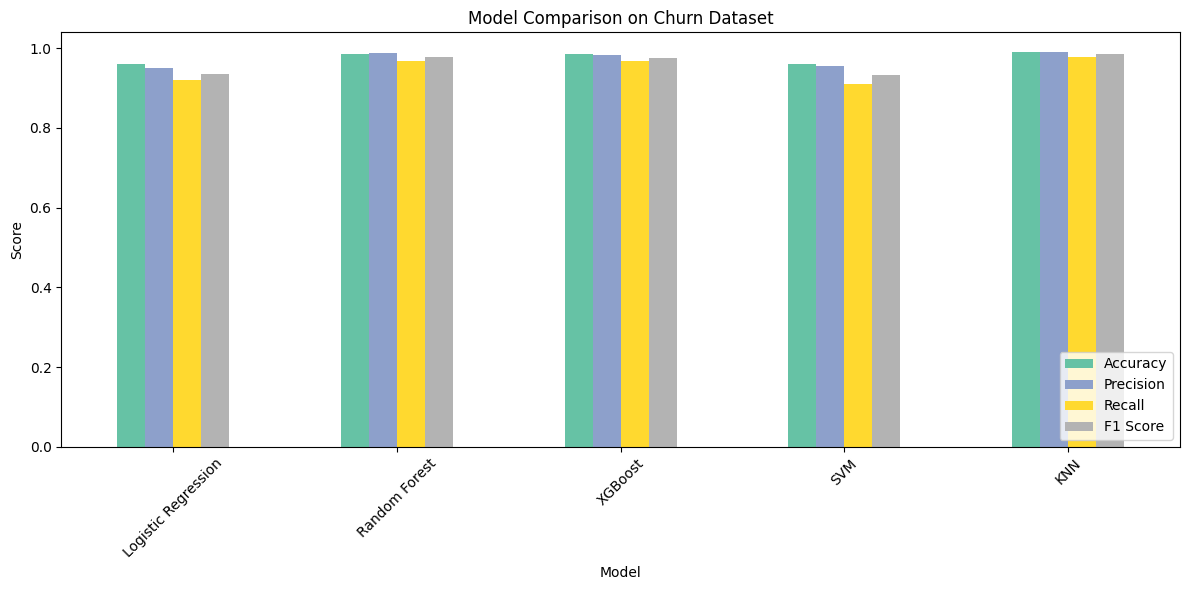

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

# 1. Load and preprocess dataset
df = pd.read_csv("/content/customer_churn_saas.csv").dropna()
df.columns = df.columns.str.lower()
target_column = 'churn'

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for models that need it (SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# 3. Fit models and collect scores
results = []

for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).set_index("Model")

# 4. Highlight best per metric
highlighted = results_df.style.highlight_max(axis=0, color='lightgreen').format("{:.4f}")
display(highlighted)

# 5. Visualization
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Model Comparison on Churn Dataset")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
